#### Предисловие: 
##### Данное исследование является 5 шагом в разработке проекта по криптовалютам и 2 в области моделирования портфелей.

### Импортируем необходимые для работы библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm
from scipy.optimize import minimize

Импортируем данные <br>
Работа просиходила с данными на временно диапазоне с декабря 2014 по февраль 2023

In [2]:
FLBX = pd.read_csv('C:/Users/nikit/Downloads/FLTB.csv').iloc[:,[0,4]]
ONEQ = pd.read_csv('C:/Users/nikit/Downloads/ONEQ.csv').iloc[:,[0,4]]
funds = pd.read_csv('C:/РАНХ обучение/НИР/2 курс/Семестр 2/Исходные данные (котировки акцийк and криптовалют)/BTC-100months (int=1mo).csv')
display(FLBX.head())
display(ONEQ.head())
display(funds.head())

,Date,Close
0,2014-11-01,50.230000
1,2014-12-01,50.070000
2,2015-01-01,50.509998
3,2015-02-01,50.139999
4,2015-03-01,50.419998


,Date,Close
0,2014-11-01,18.855000
1,2014-12-01,18.577999
2,2015-01-01,18.219000
3,2015-02-01,19.535999
4,2015-03-01,19.261999


,Unnamed: 0,shortName,2014-11-01 00:00:00+00:00,2014-12-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,2015-02-01 00:00:00+00:00,2015-03-01 00:00:00+00:00,2015-04-01 00:00:00+00:00,2015-05-01 00:00:00+00:00,2015-06-01 00:00:00+00:00,...,2022-07-01 00:00:00+00:00,2022-08-01 00:00:00+00:00,2022-09-01 00:00:00+00:00,2022-10-01 00:00:00+00:00,2022-11-01 00:00:00+00:00,2022-12-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,2023-02-01 00:00:00+00:00,2023-03-01 00:00:00+00:00,2023-03-07 00:00:00+00:00
0,0,NaN,NaN,-0.153034,-0.320835,0.169219,-0.039483,-0.03308,-0.025218,0.142847,...,0.179541,-0.140856,-0.030822,0.054755,-0.162336,-0.036175,0.398356,0.000349,-0.031001,-0.007012


### Небольшая предобработка данных

In [3]:
FLBX_prepared = pd.DataFrame(columns=FLBX.Date)
FLBX_prepared.loc[len(FLBX_prepared)] = list(FLBX.Close)
FLBX_prepared = FLBX_prepared.pct_change(axis='columns').iloc[:,1:-1]
FLBX_prepared.insert(0, "shortName", 'FLBX')
ONEQ_prepared = pd.DataFrame(columns=ONEQ.Date)
ONEQ_prepared.loc[len(ONEQ_prepared)] = list(ONEQ.Close)
ONEQ_prepared = ONEQ_prepared.pct_change(axis='columns').iloc[:,1:-1]
ONEQ_prepared.insert(0, "shortName", 'ONEQ')

funds_ = ONEQ_prepared.merge(FLBX_prepared, how='outer')
display(funds_.head())

funds = funds.iloc[:,3:]  # 'cause we want to have data stars with 2014-12-01
interesting_tickers = ['BTC-USD']
funds.insert(0, "shortName", interesting_tickers)
funds = funds.iloc[:,:-2] 

display(funds.head())

Date,shortName,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
0,ONEQ,-0.014691,-0.019324,0.072287,-0.014025,0.00732,0.029789,-0.017467,0.029289,-0.068541,...,-0.019095,-0.086966,0.125145,-0.045932,-0.105354,0.040299,0.044305,-0.089960,0.107640,0.000881
1,FLBX,-0.003185,0.008788,-0.007325,0.005584,0.00238,-0.000989,-0.003565,-0.002783,-0.001196,...,0.004463,-0.012092,0.011234,-0.014622,-0.019044,-0.006345,0.015562,-0.001249,0.012091,-0.010093


,shortName,2014-12-01 00:00:00+00:00,2015-01-01 00:00:00+00:00,2015-02-01 00:00:00+00:00,2015-03-01 00:00:00+00:00,2015-04-01 00:00:00+00:00,2015-05-01 00:00:00+00:00,2015-06-01 00:00:00+00:00,2015-07-01 00:00:00+00:00,2015-08-01 00:00:00+00:00,...,2022-05-01 00:00:00+00:00,2022-06-01 00:00:00+00:00,2022-07-01 00:00:00+00:00,2022-08-01 00:00:00+00:00,2022-09-01 00:00:00+00:00,2022-10-01 00:00:00+00:00,2022-11-01 00:00:00+00:00,2022-12-01 00:00:00+00:00,2023-01-01 00:00:00+00:00,2023-02-01 00:00:00+00:00
0,BTC-USD,-0.153034,-0.320835,0.169219,-0.039483,-0.03308,-0.025218,0.142847,0.082023,-0.191793,...,-0.157035,-0.377688,0.179541,-0.140856,-0.030822,0.054755,-0.162336,-0.036175,0.398356,0.000349


### Делаем 2 отдельных фрейма: первый - без критовалюты, второй - с ее наличием

In [4]:
df_1 = funds_.copy()
funds_.columns = [str(i).partition(' ')[0] for i in funds_.columns]
funds.columns = [str(i).partition(' ')[0] for i in funds_.columns]
df_1.index = df_1.shortName
df_1.drop(columns='shortName', inplace = True)

merge_portfolio = funds.merge(funds_, how='outer')
merge_portfolio.head()

,shortName,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
0,BTC-USD,-0.153034,-0.320835,0.169219,-0.039483,-0.03308,-0.025218,0.142847,0.082023,-0.191793,...,-0.157035,-0.377688,0.179541,-0.140856,-0.030822,0.054755,-0.162336,-0.036175,0.398356,0.000349
1,ONEQ,-0.014691,-0.019324,0.072287,-0.014025,0.00732,0.029789,-0.017467,0.029289,-0.068541,...,-0.019095,-0.086966,0.125145,-0.045932,-0.105354,0.040299,0.044305,-0.089960,0.107640,0.000881
2,FLBX,-0.003185,0.008788,-0.007325,0.005584,0.00238,-0.000989,-0.003565,-0.002783,-0.001196,...,0.004463,-0.012092,0.011234,-0.014622,-0.019044,-0.006345,0.015562,-0.001249,0.012091,-0.010093


In [5]:
merge_portfolio.index = merge_portfolio.shortName
merge_portfolio.drop(columns='shortName', inplace=True)
merge_portfolio.head()

,2014-12-01,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
shortName,,,,,,,,,,,,,,,,,,,,,
BTC-USD,-0.153034,-0.320835,0.169219,-0.039483,-0.03308,-0.025218,0.142847,0.082023,-0.191793,0.026098,...,-0.157035,-0.377688,0.179541,-0.140856,-0.030822,0.054755,-0.162336,-0.036175,0.398356,0.000349
ONEQ,-0.014691,-0.019324,0.072287,-0.014025,0.00732,0.029789,-0.017467,0.029289,-0.068541,-0.037828,...,-0.019095,-0.086966,0.125145,-0.045932,-0.105354,0.040299,0.044305,-0.089960,0.107640,0.000881
FLBX,-0.003185,0.008788,-0.007325,0.005584,0.00238,-0.000989,-0.003565,-0.002783,-0.001196,0.002594,...,0.004463,-0.012092,0.011234,-0.014622,-0.019044,-0.006345,0.015562,-0.001249,0.012091,-0.010093


### Функции для вычисления основных показателей портфеля: выручка (Revenue) и риск (Risk)

In [6]:
def portfolio_revenue(portfolio_df, weights):
    rev_for_current_asset = 1
    list_of_rev = []
    otv_ = []
    
    for i in range(len(portfolio_df.index)):
        
        for j in range(1,len(portfolio_df.columns)):
            rev_for_current_asset *= (1 + portfolio_df.iloc[i,j])
        
        list_of_rev.append(rev_for_current_asset)
        rev_for_current_asset = 1
    
    list_of_rev*=list_of_rev*weights
    return sum(list_of_rev)

def VaR(portfolio_df, weights):
    portfolio_df = portfolio_df.T
    #print(weights)
    initial_investment = 1000000
    cov_matrix = portfolio_df.cov()
    avg_rets = portfolio_df.mean()
    port_mean = np.sum(avg_rets * weights)
    port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
    mean_investment = (1+port_mean) * initial_investment
    
    stdev_investment = initial_investment * port_stdev
    conf_level1 = 0.05
    cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
    var_1d1 = initial_investment - cutoff1

    return (var_1d1/1000000)*100



### Основная оптимизационная функия поиска эффективной границы по Марковицу

In [7]:
def Making_Best_Portolio(portfolio_no_crypto, portfolio_with_crypto):

    
    plt.style.use(style='ggplot')
    fig, ax1 = plt.subplots(figsize=(13,10))
    color = []
    ax1.scatter(round(VaR(portfolio_no_crypto, np.array([0.6, 0.4])), 5), #60-акции;40-облигации 
                       round(portfolio_revenue(portfolio_no_crypto, np.array([0.6, 0.4])), 5), 
                       s=170 ,c='darkviolet', label='Classic portfolio (60/40)')
        
    axes_1 = []
    ayes_1 = []
    axes_2 = []
    ayes_2 = []
    AXes_scatter = []
    AYes_scatter = []
    for x in range(0, 101):
        for y in range(0, 101):
            z = 100 - x - y 
            if 0 <= z <= 100: 
                x_normalized = x / 100.0
                y_normalized = y / 100.0 
                z_normalized = z / 100.0  
                if x_normalized + y_normalized + z_normalized == 1:
                    risk = VaR(portfolio_with_crypto, np.array([x_normalized, y_normalized, z_normalized]))
                    rev = portfolio_revenue(portfolio_with_crypto, np.array([x_normalized, y_normalized, z_normalized]))
                    if risk <= 20:
                        AXes_scatter.append(risk)
                        AYes_scatter.append(rev)
                        
    t = np.arange(4257)
    ax1.scatter(AXes_scatter, AYes_scatter, alpha=0.1, c=t, cmap='viridis')

    #plot efficiency board
    for risk in np.arange(1, 20.5, 0.5):
        target_risk = risk
        
        #with crypto
        constraints = [
            {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1.0},  # Сумма весов = 1
            {'type': 'ineq', 'fun': lambda weights: target_risk - VaR(portfolio_with_crypto, weights)}, # Риск должен быть <= target_risk
            {'type': 'ineq', 'fun': lambda weights: weights-0},  # Все веса должны быть больше или равны 0
            {'type': 'ineq', 'fun': lambda weights: 1 - weights}  # Все веса должны быть меньше или равны 1
        ]
            
        n_assets = len(portfolio_with_crypto.index)
        initial_weights = np.ones(n_assets) / n_assets
        optimized_portfolio = minimize(lambda weights: -portfolio_revenue(portfolio_with_crypto, weights), initial_weights, method='SLSQP', constraints=constraints)
        optimal_weights = optimized_portfolio.x         # Получить оптимальные веса
        optimal_weights = np.round(optimal_weights, 3)  # Округлить веса до трех знаков после запятой
        optimal_return = -optimized_portfolio.fun       # Максимальная прибыль (убираем минус)
        cur_risk = VaR(portfolio_with_crypto, optimal_weights)
        
        if risk == 5.0:
            optimal_weights_5_perc = optimal_weights.copy()
            optimal_return_5_perc = optimal_return.copy()
            ax1.scatter(cur_risk, optimal_return, s=170, c='fuchsia', label='Best portfolio at 5% risk')
        else:
            ax1.scatter(cur_risk, optimal_return, s=60, c='g', alpha=0.7)
        axes_1.append(cur_risk)
        ayes_1.append(optimal_return)
        
        
        #no crypto
        constraints = [
            {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1.0},  
            {'type': 'ineq', 'fun': lambda weights: target_risk - VaR(portfolio_no_crypto, weights)},
            {'type': 'ineq', 'fun': lambda weights: weights-0},  
            {'type': 'ineq', 'fun': lambda weights: 1 - weights}  
        ]
            
        n_assets = len(portfolio_no_crypto.index)
        initial_weights = np.ones(n_assets) / n_assets
        optimized_portfolio = minimize(lambda weights: -portfolio_revenue(portfolio_no_crypto, weights), initial_weights, method='SLSQP', constraints=constraints)
        optimal_weights = optimized_portfolio.x         
        optimal_weights = np.round(optimal_weights, 3)  
        optimal_return = -optimized_portfolio.fun       
        cur_risk = VaR(portfolio_no_crypto, optimal_weights)
        ax1.scatter(cur_risk, optimal_return, s=60, c='g', alpha=0.7)
        axes_2.append(cur_risk)
        ayes_2.append(optimal_return)
    
    ax1.scatter(cur_risk, optimal_return, s=60, c='g', alpha=0.7, label='Effective portfolios')
    axes_2.extend(axes_1)
    ayes_2.extend(ayes_1)
    ax1.plot(axes_2, ayes_2, linestyle='-', c='red', label='Effective border')
    ax1.legend(loc="upper left", title="Значение цвета точек")
    ax1.set_title('# Portfolio with crypto VS Portfolio without crypto', color='#A52A2A', fontsize=15)
    ax1.set_xlabel('Risk (%)', color='#A52A2A', fontsize=15)
    ax1.set_ylabel('Revenue (%)', color='#A52A2A', fontsize=15)
    plt.show()
    
    return optimal_weights_5_perc, optimal_return_5_perc, VaR(portfolio_with_crypto, optimal_weights_5_perc)

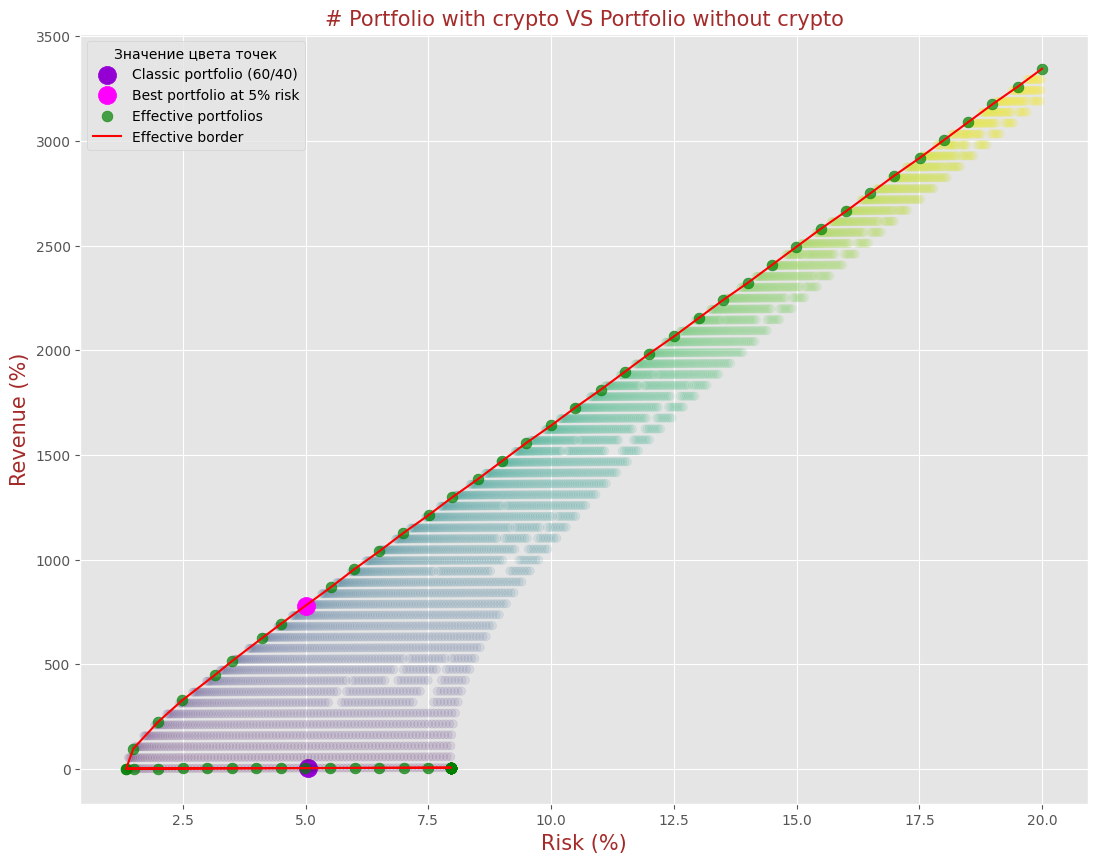

Базовые веса для портфеля без криптовалюты: [0.6, 0.4]
Выручка портфеля с выбранными весами: 3.95%
Риск (VaR) данного портфеля: 5.0%
------------------------------------------------------------------
Наилучшие веса для портфеля с криптовалютой: [ 0.149 -0.     0.851]
Выручка портфеля с выбранными весами: 779.68%
Риск (VaR) данного портфеля: 5.0%


In [8]:
result = Making_Best_Portolio(df_1, merge_portfolio)

print(f'Базовые веса для портфеля без криптовалюты: [0.6, 0.4]') #60-securities, 40-liabilities
print(f'Выручка портфеля с выбранными весами: {round(portfolio_revenue(df_1, np.array([0.6, 0.4])),2)}%')
print(f'Риск (VaR) данного портфеля: {round(VaR(df_1, np.array([0.6, 0.4])),1)}%')
print(f'------------------------------------------------------------------')
print(f'Наилучшие веса для портфеля с криптовалютой: {result[0]}')
print(f'Выручка портфеля с выбранными весами: {round(result[1],2)}%')
print(f'Риск (VaR) данного портфеля: {round(result[2],1)}%')

# Основные выводы

#1. Удалось построить эффективную границу по Марковицу, которая представляет собой вогнутую кривую, что соответствует теории Марковица;<br>
#2. Даже для 5% риска, что соответствует границе инвесторов, крайне несклонных к риску, удалось построить эффеткивный портфель, риск которого индентичен классическому портфелю (60/40) (в точности до целого), а вот выручка оказалась в 197 раз или на 775% больше в диверсифицированном портфеле. Веса в новом портфеле: [0.149, 0., 0.851] (или: 14,9% BTC, 0% ONEQ, 85,1% FLBX;<br>
#3. Результаты данного исследования проводились на временном диапазоне 7 лет, что соответствует долгосрочному периоду инвестирования. Поэтому с точки зрения LR-периода криптовалюта действительно может способствовать довольно хорошей диверсификации портфеля.<br>

В дальнейшем планируется, сравнить результаты с среднесрочным и краткосрочным периодами. А также занятся темой ребалансировки диверсификационных портфелей с криптовалютой в периоды "Альт-сезонов".